
COVID19 Chest XRays classification model


The model uses Xception/InceptionResNetV2/NasNet as base model pre-trained on ImageNet, retrained on Chest X-rays dataset





Mount Gogle Drive to save and load models n datasets

In [ ]:
#Mount Google Drive


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow
!pip install --upgrade scikit-learn
!pip install pytest
!pip install pytest-html
!pip install ipytest

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 76.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
#copy dataset folder from google drive
!cp -R /content/drive/MyDrive/Datasets/covid-19 /content



In [ ]:
#import libraries and packages

from numpy.random import seed
seed(8) #1

import tensorflow
tensorflow.random.set_seed(7)

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

from tensorflow.keras import backend as K
from tensorflow.keras.models import Model ,load_model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import tensorflow as tf

from tensorflow.python.keras import models, callbacks
from tensorflow.python.keras import layers

from tensorflow.keras import optimizers




In [ ]:
print(os.listdir("/content/"))

#Print and remove zips once done



['.config', 'covid-19', 'drive', 'sample_data']


In [ ]:
ls covid-19/four_classes/train

covid/  normal/  pneumonia_bacterial/  pneumonia_viral/


**Crete Data Generators to preprocess and prepare training and validation**

In [ ]:

from os import listdir
#data_list = listdir('/content/covid-19/four_classes/train')
data_list = listdir('/content/drive/My Drive/Datasets/covid-19/four_classes/train')

#Delete some classes that may interfere

print(len(data_list))


DATASET_PATH  = '/content/drive/My Drive/Datasets/covid-19/four_classes/train'
test_dir =  '/content/drive/My Drive/Datasets/covid-19/four_classes/test'
IMAGE_SIZE    = (256, 256)
NUM_CLASSES   = len(data_list)
BATCH_SIZE    = 8
NUM_EPOCHS    = 80
LEARNING_RATE = 0.0005



#Train datagen here is a preprocessor
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=50,
                                   featurewise_center = True,
                                   featurewise_std_normalization = True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.25,
                                   zoom_range=0.1,
                                   zca_whitening = True,
                                   channel_shift_range = 20,
                                   horizontal_flip = True ,
                                   vertical_flip = True ,
                                   validation_split = 0.2,
                                   fill_mode='constant')



train_batches = train_datagen.flow_from_directory(DATASET_PATH,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  subset = "training",
                                                  seed=41,
                                                  class_mode="categorical"
                                                  )

valid_batches = train_datagen.flow_from_directory(DATASET_PATH,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  subset = "validation",
                                                  seed=44,
                                                  class_mode="categorical"

                                                  )



4
Found 1119 images belonging to 4 classes.
Found 277 images belonging to 4 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1451: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn(


In [ ]:
path="/content/covid-19/four_classes/"
!ls -a /content/covid-19/four_classes/train/.ipynb_checkpoints
!rm -R /content/covid-19/four_classes/test/.ipynb_checkpoints
!pwd

ls: cannot access '/content/covid-19/four_classes/train/.ipynb_checkpoints': No such file or directory
rm: cannot remove '/content/covid-19/four_classes/test/.ipynb_checkpoints': No such file or directory
/content


Create a new model or Use Pre trained CNN Model and modify according to the need.

In [ ]:
# CNN model based on Xception.

from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.applications import Xception

conv_base = Xception(weights='imagenet',
                  include_top=False,
                  input_shape=(256, 256, 3))

conv_base.trainable = True

model = models.Sequential()
model.add(conv_base)

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=LEARNING_RATE),
              metrics=['acc'])

83683744/83683744 [==============================] - 1s 0us/step


**Load an already saved model (If there is a trained model already saved on drive)**

In [ ]:
#Loading saved model from .h5 file
model=load_model('/content/drive/My Drive/Colab Notebooks/4-class-Covid19-Mod-Xception.h5')
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 8, 8, 2048)        20861480  
                                                                 
 flatten (Flatten)           (None, 131072)            0         
                                                                 
 dropout (Dropout)           (None, 131072)            0         
                                                                 
 dense (Dense)               (None, 256)               33554688  
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 4)                 1

Training

In [ ]:
""" Genetic Algorithm utility functions used """

def initialize_population(population_size, min_lr, max_lr):
    return np.random.uniform(min_lr, max_lr, size=(population_size,))

def evaluate_fitness(population, train_batches, valid_batches, NUM_EPOCHS):
    fitness_scores = []
    for lr in population:
        result = model.fit_generator(train_batches,
                                     steps_per_epoch=STEP_SIZE_TRAIN,
                                     validation_data=valid_batches,
                                     validation_steps=STEP_SIZE_VALID,
                                     epochs=NUM_EPOCHS,
                                     callbacks=[callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.25,
                                                                            patience=1, min_lr=lr, verbose=1)])
        val_acc = result.history['val_accuracy'][-1]
        fitness_scores.append(val_acc)
    return np.array(fitness_scores)

def select_parents(population, fitness_scores, num_parents):
    sorted_indices = np.argsort(fitness_scores)[::-1]
    return population[sorted_indices[:num_parents]]

def crossover(parents, offspring_size):
    offspring = np.empty(offspring_size)
    crossover_point = np.random.randint(1, len(parents[0]))
    for k in range(offspring_size[0]):
        parent1_idx = k % len(parents)
        parent2_idx = (k+1) % len(parents)
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

def mutate(offspring_crossover, min_lr, max_lr, mutation_rate):
    for idx in range(offspring_crossover.shape[0]):
        for gene_idx in range(offspring_crossover.shape[1]):
            if np.random.rand() < mutation_rate:
                offspring_crossover[idx, gene_idx] = np.random.uniform(min_lr, max_lr)
    return offspring_crossover


In [ ]:
"""
Test Cases for the Genetic Algorithm functions
Run using pytest

"""
import ipytest
ipytest.autoconfig()
import numpy as np

def test_initialize_population():
    population_size = 10
    min_lr = 0.1
    max_lr = 0.5

    population = initialize_population(population_size, min_lr, max_lr)

    assert len(population) == population_size
    assert np.all(population >= min_lr)
    assert np.all(population <= max_lr)

def test_select_parents():
    population = np.array([0.1, 0.2, 0.3, 0.4, 0.5])
    fitness_scores = np.array([0.5, 0.4, 0.3, 0.2, 0.1])
    num_parents = 3

    selected_parents = select_parents(population, fitness_scores, num_parents)

    assert len(selected_parents) == num_parents
    assert np.all(selected_parents == np.array([0.1, 0.2, 0.3]))

def test_crossover():
    parents = np.array([[0.1, 0.2, 0.3], [0.4, 0.5, 0.6], [0.7, 0.8, 0.9]])
    offspring_size = (2, 3)

    offspring = crossover(parents, offspring_size)

    assert offspring.shape == offspring_size
    assert np.all(offspring >= 0.1)
    assert np.all(offspring <= 0.9)

def test_mutate():
    offspring_crossover = np.array([[0.1, 0.2, 0.3], [0.4, 0.5, 0.6]])
    min_lr = 0.1
    max_lr = 1
    mutation_rate = 0.2

    mutated_offspring = mutate(offspring_crossover, min_lr, max_lr, mutation_rate)

    assert mutated_offspring.shape == offspring_crossover.shape
    assert np.all(mutated_offspring >= min_lr)
    assert np.all(mutated_offspring <= max_lr)

In [ ]:
ipytest.run()

....                                                                                         [100%]
4 passed in 0.03s


<ExitCode.OK: 0>

In [ ]:
""" Genetic Algorithm and training """
print(len(train_batches))
print(len(valid_batches))

STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size

# Set your hyperparameters
population_size = 10
num_generations = 5
mutation_rate = 0.1
num_parents_mating = 5
min_lr = 1e-6
max_lr = 1e-2

# Initialize population
population = initialize_population(population_size, min_lr, max_lr)

# Genetic Algorithm
for generation in range(num_generations):
    # Evaluate fitness
    fitness_scores = evaluate_fitness(population, train_batches, valid_batches, NUM_EPOCHS)

    # Select parents
    parents = select_parents(population, fitness_scores, num_parents_mating)

    # Crossover
    offspring_crossover = crossover(parents, offspring_size=(population_size - parents.shape[0],))

    # Mutation
    offspring_mutation = mutate(offspring_crossover, min_lr, max_lr, mutation_rate)

    # Create new population
    population[0:parents.shape[0], :] = parents
    population[parents.shape[0]:, :] = offspring_mutation

# After GA convergence, select the best LR
best_lr = population[np.argmax(evaluate_fitness(population, train_batches, valid_batches, NUM_EPOCHS))]


STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size

result=model.fit_generator(train_batches,
                        steps_per_epoch =STEP_SIZE_TRAIN,
                        validation_data = valid_batches,
                        validation_steps = STEP_SIZE_VALID,
                        epochs= NUM_EPOCHS,
                           callbacks=[callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.25,
                              patience=1, min_lr=best_lr, verbose=1),
                                      callbacks.CSVLogger('training2.csv', append=True)]
                       )

!cp /content/training2.csv /content/drive/"My Drive"/"Colab Notebooks"

140
35


<ipython-input-10-a1d225f898fe>:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  result=model.fit_generator(train_batches,
/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1885: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/80
139/139 [==============================] - 1531s 11s/step - loss: 1.3566 - acc: 0.3411 - val_loss: 1.3160 - val_acc: 0.5000 - lr: 5.0000e-04
Epoch 2/80
139/139 [==============================] - ETA: 0s - loss: 0.9542 - acc: 0.6238
Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
139/139 [==============================] - 1424s 10s/step - loss: 0.9542 - acc: 0.6238 - val_loss: 1.9283 - val_acc: 0.5625 - lr: 5.0000e-04
Epoch 3/80
139/139 [==============================] - 1409s 10s/step - loss: 0.7093 - acc: 0.6958 - val_loss: 0.5520 - val_acc: 0.7684 - lr: 1.2500e-04
Epoch 4/80
139/139 [==============================] - 1408s 10s/step - loss: 0.5955 - acc: 0.7453 - val_loss: 0.4850 - val_acc: 0.7500 - lr: 1.2500e-04
Epoch 5/80
139/139 [==============================] - 1436s 10s/step - loss: 0.5230 - acc: 0.7948 - val_loss: 0.4610 - val_acc: 0.8419 - lr: 1.2500e-04
Epoch 6/80
139/139 [==============================] - 1422s 10s/step - loss: 0.4

Evaluation

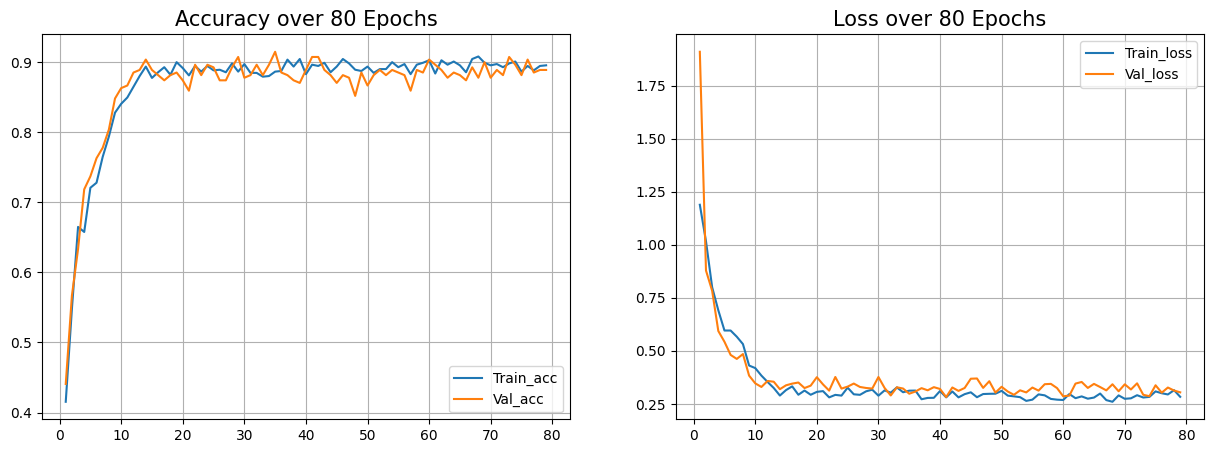

In [ ]:
#Plot the accuracy and loss graphs

import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('training.csv')

def plot_acc_loss(result, epochs):
    acc = result['acc']
    loss = result['loss']
    val_acc = result['val_acc']
    val_loss = result['val_loss']
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    plt.plot(range(1,epochs), acc[1:], label='Train_acc')
    plt.plot(range(1,epochs), val_acc[1:], label='Val_acc')
    plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.subplot(122)
    plt.plot(range(1,epochs), loss[1:], label='Train_loss')
    plt.plot(range(1,epochs), val_loss[1:], label='Val_loss')
    plt.title('Loss over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_acc_loss(df, 80)

In [ ]:
model.save('4-class-Covid19-Mod-Xception.h5')
!cp /content/"4-class-Covid19-Mod-Xception.h5" /content/drive/"My Drive"/"Colab Notebooks"


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#Loading saved model from .h5 file
model=load_model('/content/drive/My Drive/Colab Notebooks/4-class-Covid19-Mod-Xception.h5')
print(model.summary())

**Evaluate using evaluate Generator**

In [ ]:

test_datagen = ImageDataGenerator(rescale=1. / 255)
test_dir =  '/content/drive/MyDrive/Datasets/covid-19/four_classes/test'
eval_generator = test_datagen.flow_from_directory(test_dir,target_size=IMAGE_SIZE,batch_size=1,
                                                  shuffle=False, seed=42, class_mode="categorical")
eval_generator.reset()


Found 242 images belonging to 4 classes.


In [ ]:
#Evalute the trained model on evaluate generator
eval_generator.reset()
x = model.evaluate_generator(eval_generator,
                           steps = np.ceil(len(eval_generator)),
                           use_multiprocessing = False,
                           verbose = 1,
                           workers=1,
                           )


print('Test loss:' , x[0])
print('Test accuracy:',x[1])

#Poor test accuracy due to the small dataset size

<ipython-input-11-a8b315deeab3>:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  x = model.evaluate_generator(eval_generator,


242/242 [==============================] - 103s 413ms/step - loss: 0.4450 - acc: 0.8595
Test loss: 0.44495952129364014
Test accuracy: 0.8595041036605835


### **`Predict Results using predict generator and evaluate the accuracy and Confusion matrix `**

<ipython-input-14-fc8622bf6a04>:10: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict = model.predict_generator(eval_generator,steps = np.ceil(len(eval_generator)))


[[20  0  0  0]
 [ 5 71  0  1]
 [ 0  2 68  5]
 [ 2  6 13 49]]
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        20
           1       0.90      0.92      0.91        77
           2       0.84      0.91      0.87        75
           3       0.89      0.70      0.78        70

    accuracy                           0.86       242
   macro avg       0.84      0.88      0.85       242
weighted avg       0.87      0.86      0.86       242



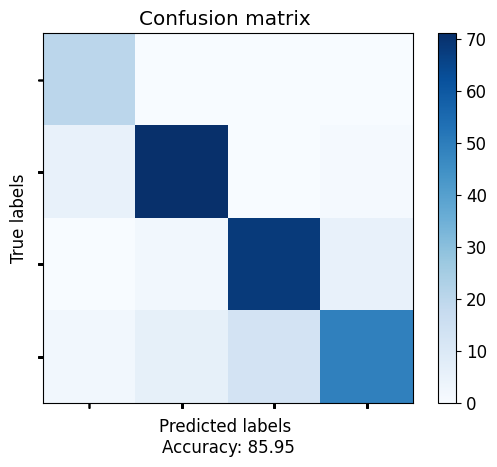

In [ ]:
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report



filenames = eval_generator.filenames
nb_samples = len(filenames)
eval_generator.reset()
predict = model.predict_generator(eval_generator,steps = np.ceil(len(eval_generator)))
pp=predict
predict=np.argmax(predict, axis=-1)
classes= eval_generator.classes[eval_generator.index_array]
acc=sum(predict==classes)/len(predict)
names=["covid","normal","pneumonia_bac","pneumonia_vir"]
#print(confusion_matrix(classes,predict))

font = {
'size': 12
}
plt.rc('font', **font)
cm = confusion_matrix(classes, predict)
print(cm)
print(classification_report(classes,predict))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel('Predicted labels \nAccuracy: {:0.2f}'.format(acc*100))
plt.ylabel("True labels")
plt.xticks(classes, [])
plt.yticks(classes, [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

In [ ]:
import matplotlib.font_manager
print([f.name for f in matplotlib.font_manager.fontManager.ttflist])

['DejaVu Sans', 'DejaVu Sans', 'cmex10', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'STIXSizeFourSym', 'STIXSizeTwoSym', 'cmr10', 'DejaVu Sans', 'STIXGeneral', 'STIXGeneral', 'DejaVu Serif', 'DejaVu Serif Display', 'cmb10', 'cmtt10', 'cmsy10', 'STIXSizeFourSym', 'STIXSizeThreeSym', 'DejaVu Sans Mono', 'STIXNonUnicode', 'DejaVu Sans', 'cmss10', 'STIXNonUnicode', 'cmmi10', 'STIXSizeTwoSym', 'STIXSizeOneSym', 'STIXGeneral', 'STIXSizeOneSym', 'STIXNonUnicode', 'STIXNonUnicode', 'STIXGeneral', 'DejaVu Serif', 'DejaVu Serif', 'DejaVu Sans Mono', 'STIXSizeThreeSym', 'STIXSizeFiveSym', 'DejaVu Sans Display', 'DejaVu Serif', 'Liberation Mono', 'Liberation Sans Narrow', 'Liberation Sans', 'Liberation Sans Narrow', 'Liberation Sans Narrow', 'Liberation Mono', 'Liberation Mono', 'Liberation Serif', 'Liberation Sans', 'Liberation Serif', 'Liberation Sans', 'Liberation Serif', 'Humor Sans', 'Liberation Serif', 'Liberation Sans', 'Liberation Sans Narrow', 'Liberation Mono']


**Test Single image**

1/1 [==============================] - 0s 83ms/step
[[4.4874935e-03 9.9289024e-01 4.3570707e-04 2.1865971e-03]]


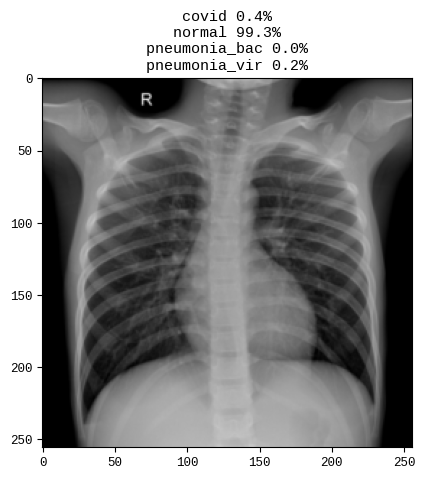

In [ ]:
import cv2
from skimage import transform
'''
'/content/drive/MyDrive/Datasets/covid-19/covid_folds/Fold5/normal/IM-0493-0001.jpeg'
'/content/drive/MyDrive/Datasets/covid-19/covid_folds/Fold5/covid/ryct.2020200034.fig5-day0.jpeg'
'/content/drive/MyDrive/Datasets/covid-19/covid_folds/Fold5/pneumonia_bacterial/person264_bacteria_1229.jpeg'
'/content/drive/MyDrive/Datasets/covid-19/covid_folds/Fold5/pneumonia_viral/person419_virus_857.jpeg'
'''
path = '/content/drive/MyDrive/Datasets/covid-19/covid_folds/Fold5/normal/IM-0493-0001.jpeg'

img_r = cv2.imread(path)


img1 = np.array(img_r).astype('float32')/255
img2 = transform.resize(img1, (256, 256, 3))

img = np.expand_dims(img2, axis=0)

r=model.predict(img)

labels = {0: "covid",1: "normal",2: "pneumonia_bac",3: "pneumonia_vir"}

names= dict((v,k) for k,v in labels.items())
index = np.argmax(r)
name=names.get(index,"Unknown")

p=round(r.max()*100, 3)  #to find maximum score

scores=r
print(scores)

font = {
'family': 'Liberation Mono',
'size': 9,

}
plt.rc('font', **font)

#plt.title(name +" ("+ str(p)+")")
plt.title(labels[0] +" "+ str(round(scores[0][0]*100,1))+"%"+"\n"+
          labels[1] +" "+ str(round(scores[0][1]*100,1))+"%"+"\n"+
          labels[2] +" "+ str(round(scores[0][2]*100,1))+"%"+"\n"+
          labels[3] +" "+ str(round(scores[0][3]*100,1))+"%")
plt.imshow(img2)


**Test Whole Folder**

In [ ]:
import cv2
from skimage import transform
path  = "/content/drive/MyDrive/Datasets/covid-19/covid_folds/Fold1/covid"
count=[0,0,0,0]
folder_name = path
files=os.listdir(folder_name)
for i in range(len(files)):
  img_r = cv2.imread(folder_name+"/"+files[i])

  img = np.array(img_r).astype('float32')/255

  img = transform.resize(img, (256, 256, 3))
  img = np.expand_dims(img, axis=0)

  predict=model.predict(img)
  p=np.argmax(predict, axis=-1)
  #p=model.predict_classes(img)
  count[p[0]]+=1
  print(str(p[0])+" "+files[i])

print()

labels = {0: "covid",1: "normal",2: "pneumonia_bac",3: "pneumonia_vir"}

print("Covid Folder\n",labels[0],",",labels[1],",",labels[2],",",labels[3],",")
print(count, "\n")

1/1 [==============================] - 0s 69ms/step
0 1-s2.0-S0929664620300449-gr2_lrg-a(1).jpg
1/1 [==============================] - 0s 67ms/step
0 1-s2.0-S0929664620300449-gr2_lrg-c(1).jpg
1/1 [==============================] - 0s 59ms/step
0 1-s2.0-S1684118220300608-main.pdf-001(1).jpg
1/1 [==============================] - 0s 76ms/step
0 1-s2.0-S0140673620303706-fx1_lrg(1).jpg
1/1 [==============================] - 0s 75ms/step
0 1-s2.0-S0929664620300449-gr2_lrg-d(1).jpg
1/1 [==============================] - 0s 76ms/step
0 1-s2.0-S0929664620300449-gr2_lrg-d.jpg
1/1 [==============================] - 0s 73ms/step
0 1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-000-fig1b.png
1/1 [==============================] - 0s 39ms/step
0 1-s2.0-S0140673620303706-fx1_lrg.jpg
1/1 [==============================] - 0s 43ms/step
0 1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-000-fig1a.png
1/1 [==============================] - 0s 44ms/step
0 1-s2.0-S1684118220300682-main.pdf-003-b1.png
1/1 [=